In [1]:
# imports
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization

In [2]:
# the tiny corpus of text ! 
text = 'red pink pink blue blue yellow ORANGE BLUE BLUE PINK' # 🌈
print(text)
print('string length : ',len(text))

red pink pink blue blue yellow ORANGE BLUE BLUE PINK
string length :  52


In [3]:
# convert all letters to lower case
text_lowercase = text.lower()
print(text_lowercase)
print('string length : ',len(text_lowercase))

red pink pink blue blue yellow orange blue blue pink
string length :  52


In [4]:
# some regex to tokenize the string to words and return them in a list
words = re.findall(r'\w+', text_lowercase)
print(words)
print('count : ',len(words))

['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink']
count :  10


In [5]:
# create vocab
vocab = set(words)
print(vocab)
print('count : ',len(vocab))

{'blue', 'orange', 'red', 'yellow', 'pink'}
count :  5


In [6]:
# create vocab including word count
counts_a = dict()
for w in words:
    counts_a[w] = counts_a.get(w,0)+1
print(counts_a)
print('count : ',len(counts_a))

{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
count :  5


In [7]:
# create vocab including word count using collections.Counter
counts_b = dict()
counts_b = Counter(words)
print(counts_b)
print('count : ',len(counts_b))

Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5


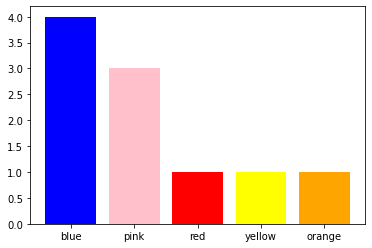

In [8]:
# barchart of sorted word counts
d = {'blue': counts_b['blue'], 'pink': counts_b['pink'], 'red': counts_b['red'], 'yellow': counts_b['yellow'], 'orange': counts_b['orange']}
plt.bar(range(len(d)), list(d.values()), align='center', color=d.keys())
_ = plt.xticks(range(len(d)), list(d.keys()))

In [9]:
print('counts_b : ', counts_b)
print('count : ', len(counts_b))

counts_b :  Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5


In [11]:
# data
word = 'dearz' # 🦌

In [12]:
# Find all the ways you can split a word into 2 parts !
# splits with a loop
splits_a = []
for i in range(len(word)+1):
    splits_a.append([word[:i],word[i:]])

for i in splits_a:
    print(i)

['', 'dearz']
['d', 'earz']
['de', 'arz']
['dea', 'rz']
['dear', 'z']
['dearz', '']


In [13]:
# same splits, done using a list comprehension
splits_b = [(word[:i], word[i:]) for i in range(len(word) + 1)]

for i in splits_b:
    print(i)

('', 'dearz')
('d', 'earz')
('de', 'arz')
('dea', 'rz')
('dear', 'z')
('dearz', '')


In [14]:
# Delete a letter from each string in the splits list
# deletes with a loop
splits = splits_a
deletes = []

print('word : ', word)
for L,R in splits:
    if R:
        print(L + R[1:], ' <-- delete ', R[0])

word :  dearz
earz  <-- delete  d
darz  <-- delete  e
derz  <-- delete  a
deaz  <-- delete  r
dear  <-- delete  z


In [15]:
# breaking it down
print('word : ', word)
one_split = splits[0]
print('first item from the splits list : ', one_split)
L = one_split[0]
R = one_split[1]
print('L : ', L)
print('R : ', R)
print('*** now implicit delete by excluding the leading letter ***')
print('L + R[1:] : ',L + R[1:], ' <-- delete ', R[0])

word :  dearz
first item from the splits list :  ['', 'dearz']
L :  
R :  dearz
*** now implicit delete by excluding the leading letter ***
L + R[1:] :  earz  <-- delete  d


In [16]:
# deletes with a list comprehension
splits = splits_a
deletes = [L + R[1:] for L, R in splits if R]

print(deletes)
print('*** which is the same as ***')
for i in deletes:
    print(i)

['earz', 'darz', 'derz', 'deaz', 'dear']
*** which is the same as ***
earz
darz
derz
deaz
dear


In [17]:
vocab = ['dean','deer','dear','fries','and','coke']
edits = list(deletes)

print('vocab : ', vocab)
print('edits : ', edits)

candidates=[]

### START CODE HERE ###
candidates = set(vocab).intersection(set(edits))
### END CODE HERE ###

print('candidate words : ', candidates)

vocab :  ['dean', 'deer', 'dear', 'fries', 'and', 'coke']
edits :  ['earz', 'darz', 'derz', 'deaz', 'dear']
candidate words :  {'dear'}


# Building autocorrect

In [ ]:
import re
from collections import Counter
import numpy as np
import pandas as pd

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: process_data
def process_data(file_name):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = [] # return this variable correctly

    ### START CODE HERE ### 
    with open(file_name) as f:
        file = f.read()
    file = file.lower()
    words = re.findall(r'\w+', file)   
    ### END CODE HERE ###
    
    return words

In [ ]:
#DO NOT MODIFY THIS CELL
word_l = process_data('shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: get_count
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    
    word_count_dict = {}  # fill this with word counts
    ### START CODE HERE 
    word_count_dict = Counter(word_l)       
    ### END CODE HERE ### 
    return word_count_dict

In [ ]:
#DO NOT MODIFY THIS CELL
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: get_probs
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {}  # return this variable correctly
    
    ### START CODE HERE ###
    total_l = sum(word_count_dict.values())
    for k,v in word_count_dict.items():
        probs[k] = v/total_l
        
    ### END CODE HERE ###
    return probs

In [ ]:
#DO NOT MODIFY THIS CELL
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

# String Manipulations

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: deletes
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    
    ### START CODE HERE ###
    split_l_alternate = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [L + R[1:] for L, R in split_l if R]
    ### END CODE HERE ###

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [ ]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

In [ ]:
# test # 2
print(f"Number of outputs of delete_letter('at') is {len(delete_letter('at'))}")

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: switches
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    
    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for L,R in split_l:
        if len(R) > 2:
            switch =  L + R[1] + R[0] + R[2:]
            switch_l.append(switch)
        elif len(R) == 2:
            switch = L + R[1] + R[0]
            switch_l.append(switch)
    ### END CODE HERE ###
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [ ]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

In [ ]:
# test # 2
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

In [ ]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: replaces
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    replace_set = set()
    for p in letters:
        replace = [L + p + R[1:] for L, R in split_l if R]
        for r in replace:    
            replace_set.add(r)
    replace_set.discard(word)
    ### END CODE HERE ###
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [ ]:
replace_l = replace_letter(word='can',
                              verbose=True)

In [ ]:
# test # 2
print(f"Number of outputs of replace_letter('at') is {len(replace_letter('at'))}")

In [ ]:
# UNQ_C7 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: inserts
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    
    ### START CODE HERE ###
    for c in range(len(word)+1):
        split_l.append((word[0:c],word[c:]))
    insert_l = [ a + l + b for a,b in split_l for l in letters]
    ## END CODE HERE ###

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [ ]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

In [ ]:
# test # 2
print(f"Number of outputs of insert_letter('at') is {len(insert_letter('at'))}")

In [ ]:
# UNQ_C8 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: edit_one_letter
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    
    ### START CODE HERE ###
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    insert_l = insert_letter(word)
    switch_l = switch_letter(word)
    total_l = delete_l + replace_l + insert_l + switch_l
    edit_one_set = (set(total_l))
    ### END CODE HERE ###

    return edit_one_set

In [ ]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

In [ ]:
# UNQ_C9 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: edit_two_letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    
    ### START CODE HERE ###
    edit_two_l = []
    edit_one = edit_one_letter(word)
    for w in edit_one:
        if w:
            edit_two = edit_one_letter(w)
            edit_two_set.update(edit_two)
    ### END CODE HERE ###
    
    return edit_two_set

In [ ]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

# Suggest spelling suggestions

Now you will use your edit_two_letters function to get a set of all the possible 2 edits on your word. You will then use those strings to get the most probable word you meant to type aka your typing suggestion.

In [ ]:
# example of logical operation on lists or sets
print( [] and ["a","b"] )
print( [] or ["a","b"] )
#example of Short circuit behavior
val1 =  ["Most","Likely"] or ["Less","so"] or ["least","of","all"]  # selects first, does not evalute remainder
print(val1)
val2 =  [] or [] or ["least","of","all"] # continues evaluation until there is a non-empty list
print(val2)

In [ ]:
# UNQ_C10 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# GRADED FUNCTION: get_corrections
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
    ### START CODE HERE ###
    if n == 1:
        one_edit = edit_one_letter(word)
        all_edits = one_edit
    elif n == 2:
        one_edit = edit_one_letter(word)
        two_edits = edit_two_letters(word)
        all_edits = two_edits.intersection(one_edit)
    
    suggestions = all_edits.intersection(set(probs.keys()))   
    n_best = [(s, probs[s]) for s in suggestions]
    n_best.sort(key=lambda tup: tup[1], reverse = True)  # sorts in place
    suggestions = set([i[0] for i in n_best])
        
    ### END CODE HERE ###
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [ ]:
# Test your implementation - feel free to try other words in my word
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

# Minimum Edit distance

In [ ]:
# UNQ_C11 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: min_edit_distance
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input: 
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    # use deletion and insert cost as  1
    m = len(source) 
    n = len(target) 
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Fill in column 0, from row 1 to row m, both inclusive
    for row in range(1,m+1): # Replace None with the proper range
        D[row,0] = D[row-1,0] + del_cost
        
    # Fill in row 0, for all columns from 1 to n, both inclusive
    for col in range(1,n+1): # Replace None with the proper range
        D[0,col] = D[0,col-1] + ins_cost
        
    # Loop through row 1 to row m, both inclusive
    for row in range(1,m+1): 
        
        # Loop through column 1 to column n, both inclusive
        for col in range(1,n+1):
            
            # Intialize r_cost to the 'replace' cost that is passed into this function
            r_cost = rep_cost
            
            # Check to see if source character at the previous row
            # matches the target character at the previous column, 
            if source[row-1] == target[col-1]:
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0
                
            # Update the cost at row, col based on previous entries in the cost matrix
            # Refer to the equation calculate for D[i,j] (the minimum of three calculated costs)
            D[row,col] = min([D[row-1,col]+del_cost, D[row,col-1]+ins_cost, D[row-1,col-1]+r_cost])
          
    # Set the minimum edit distance with the cost found at row m, column n
    med = D[m,n]
    
    ### END CODE HERE ###
    return D, med

In [ ]:
#DO NOT MODIFY THIS CELL
# testing your implementation 
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

In [ ]:
#DO NOT MODIFY THIS CELL
# testing your implementation 
source =  'eer'
target = 'near'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list(source)
idx.insert(0, '#')
cols = list(target)
cols.insert(0, '#')
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

In [ ]:
source = "eer"
targets = edit_one_letter(source,allow_switches = False)  #disable switches since min_edit_distance does not include them
for t in targets:
    _, min_edits = min_edit_distance(source, t,1,1,1)  # set ins, del, sub costs all to one
    if min_edits != 1: print(source, t, min_edits)

In [ ]:
source = "eer"
targets = edit_two_letters(source,allow_switches = False) #disable switches since min_edit_distance does not include them
for t in targets:
    _, min_edits = min_edit_distance(source, t,1,1,1)  # set ins, del, sub costs all to one
    if min_edits != 2 and min_edits != 1: print(source, t, min_edits)